## Loading the Dataset

In [1]:
from data import STEAD
stead = STEAD('/home/srivastava-shared/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


## Getting Data and Labels in the format for CREIME

In [2]:
X, y = stead.get_creime_rt_data(stead.trace_list()[-20:])

 85%|████████▌ | 17/20 [00:00<00:00, 30.57it/s]

In [3]:
X

[array([[ 0.38460794, -0.01681431,  8.323111  ],
        [ 5.0119405 , -7.367551  , -6.629982  ],
        [-0.7932594 , 10.19844   ,  1.375295  ],
        ...,
        [10.036092  , -9.027016  ,  5.4745464 ],
        [16.011913  ,  9.936674  ,  0.44849315],
        [ 4.4780884 ,  4.379032  , -1.3328882 ]], dtype=float32),
 array([[ 48.683228  , -21.809057  ,  15.000697  ],
        [ -6.5373497 ,  -0.13117428, -28.90362   ],
        [-59.50667   ,  19.267305  , -12.725542  ],
        ...,
        [ 66.05993   ,  20.516434  ,  29.013844  ],
        [-42.999172  ,  -9.722644  , -19.61652   ],
        [ -8.4507    ,  17.49311   ,  -0.6475264 ]], dtype=float32),
 array([[ -16.895485 ,   24.388123 ,   18.358835 ],
        [   8.749285 ,   -8.598199 ,    8.71096  ],
        [  -2.8154755,   -1.5990313,  -11.397819 ],
        ...,
        [-137.7836   ,    1.3002766,   27.796373 ],
        [-105.41199  ,  -32.21093  ,   70.42985  ],
        [-128.71175  ,  130.87837  ,   85.82348  ]], dtype=fl

In [4]:
y.shape

(20, 6000)

In [5]:
from visualizations import plot_creime_rt_data

100%|██████████| 20/20 [00:00<00:00, 23.35it/s]


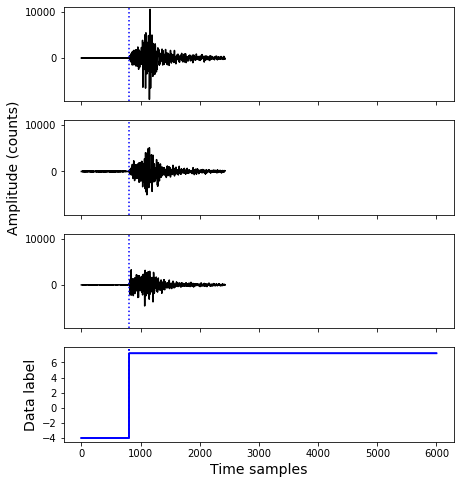

In [6]:
plot_creime_rt_data(X[6], y[6])

## Loading CREIME_RT

In [7]:
from models import CREIME_RT
creime_rt = CREIME_RT()
print(creime_rt)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6000, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 6000, 64)     1600        ['input_1[0][0]']                
                                                                                                  
 p_re_lu (PReLU)                (None, 6000, 64)     384000      ['conv1d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 6000, 64)     0           ['p_re_lu[0][0]']                
                                                                                              

In [8]:
y_pred, predictions = creime_rt.predict(X)

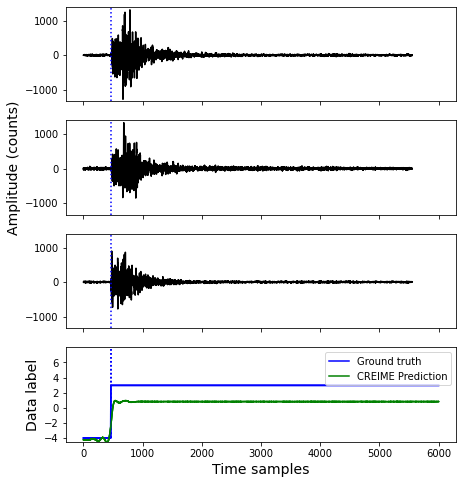

In [9]:
plot_creime_rt_data(X[3], y[3], y_pred[3])

In [10]:
predictions

[(1, 0.5912117),
 (1, 0.810013),
 (1, 1.2239239),
 (1, 0.8109102),
 (1, 0.65972584),
 (1, 1.1471974),
 (1, 1.2954328),
 (1, 0.6235431),
 (1, 1.1177331),
 (1, 1.5497956),
 (1, 3.1143708),
 (1, 1.2015022),
 (1, 0.909165),
 (1, 1.3609053),
 (1, 1.0626423),
 (1, 0.44676223),
 (1, 1.0644855),
 (1, 1.1750411),
 (1, 0.7565864),
 (1, 0.75538516)]

Alternatively

In [11]:
model = creime_rt.get_model()